## Creating Regression Model:<br/>  to predict house sale price 

### Overview

**Objectives & Background**

As a data scientist my task here is to create a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale. The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It includes over 70 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. The Ames Housing is an increadible alternative for data scientists looking for a revamped version of the frequently used Boston Housing dataset.<br/> 

The Ames Housing dataset is used in the Advanced Regression Techniques challenge on the Kaggle website: https://www.kaggle.com/c/dsi-us-10-project-2-regression-challenge. My school, General Assembly is hosting a competition on Kaggle for the same topic which provides me an opportunity as a DSI student to use the platform for practicing advanced predictive modeling process and then refine models over time. 

**Requirements**
- Problem Statement & Data Analysis Plan
- Data Cleaning & EDA 
- Preprocessing and Modeling
- Conclusion and Recommendations 


-- Sumbissions --
 > - README.md 
 > - Technical Document: Jupyter notebook including analysis and models 
 > - At least one prediction Model submission on DSI-US-10 Regression Challenge 
 > - Presentation slides
 > - Data files
 
***Reference:***<br>
[DSI-US-10 Project_2 README](https://git.generalassemb.ly/DSI-US-10/project_2/blob/master/README.md)<br/>
[Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### Importing Packages &  Load Data 

In [6]:
# importing all required packages for EDA, cleaning process and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries/packages required for Linear Regression and Modeling:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics

%matplotlib inline

In [10]:
#define the file path to import the data
file_path = '../datasets/train.csv'
train = pd.read_csv(file_path)

In [13]:
train.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


### Data Cleaning and Exploring Data  Analysis:
Datasets Description: 
> * DataFrame (train.csv) includes 81 variables (columns) and 2051 rows listing residential properties sold in Ames, Iowa from 2006 to 2010. Data columns include 23 nominal, 23 ordinal, 15 discrete, and 20 continuous variables.<br>
   * Data types: float64(11 variables), int64(28 variables), object(42 variables)

In [14]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

**Consistency:**<br>
Renaming all variables with lower case and getting rid of whitespace.

In [15]:
 # renaming columns
train.columns = [column_name.lower().replace(' ', '_') for 
                 column_name in train.columns] 

**Dealing with missing data:**<br>
As expected some incomplete values were observed which require enormouse time to detect and correct. To simplify data cleaning I would most likely narrow down the effort and select only variables that are relevent to our objectives along the process.

The bar chart below shows the sum of null/missing values (blank cells) for each data column. Further examination shows that NaN values don't necessary mean that data is missing. Null value for most of these variables simply indicate that a house does not offer these features, for example NA for "Alley" or "Fence" means there is no Alley or house does not have a Fence. As a solution:

- For variables similar to the mentioned examples NA cells will be filled with "No 'Feature'"
- For other variables null values will be replaced with Mode or Median of the same column since the missing datasets are not significant.

In [16]:
# Explore DataFrame dimension(DF), 
train.shape # Loot at the dimension; variables & rows

(2051, 81)

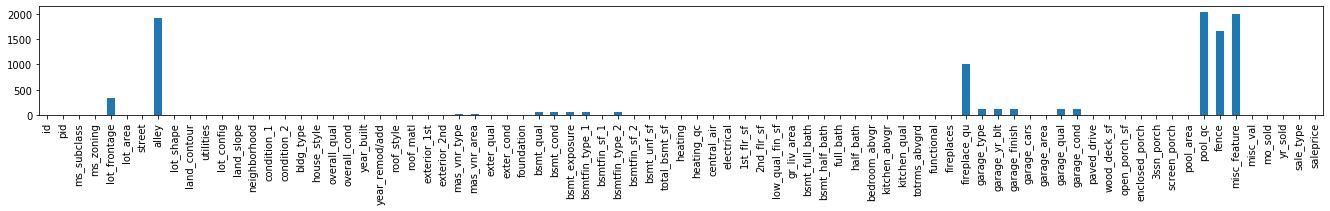

In [17]:
#plotting NaN values columns
train.isnull().sum().plot(kind = 'bar', figsize = (23,2)); 
plt.savefig('../plots/missingdata.png')

In [8]:
#filling null cells for when feature doesn't exist
train["alley"].fillna("No Alley", inplace = True) 
train["bsmt_qual"].fillna("No Basement", inplace = True)
train["bsmt_cond"].fillna("No Basement", inplace = True) 
train["bsmt_exposure"].fillna("No Basement", inplace = True) 
train["bsmtfin_type_1"].fillna("No Basement", inplace = True) 
train["bsmtfin_type_2"].fillna("No Basement", inplace = True)
train["fireplace_qu"].fillna("No Fireplace", inplace = True)
train["pool_qc"].fillna("No Pool", inplace = True)
train["fence"].fillna("No Fence", inplace = True)
train["misc_feature"].fillna("No Feature", inplace = True)
train["garage_type"].fillna("No Garage", inplace = True)
train["garage_yr_blt"].fillna("No Garage", inplace = True)
train["garage_finish"].fillna("No Garage", inplace = True)
train["garage_qual"].fillna("No Garage", inplace = True)
train["garage_cond"].fillna("No Garage", inplace = True)

In [9]:
#filling null values with median & mode 
train['mas_vnr_type'].describe() # looks into mode (top)
train['mas_vnr_type'].fillna("None", inplace = True)
train['mas_vnr_area'].fillna(train['mas_vnr_area'].median(), inplace = True)
train['lot_frontage'].fillna(train['lot_frontage'].median(), inplace = True)
train['garage_area'].fillna(train['garage_area'].median(), inplace = True)
train['total_bsmt_sf'].fillna(train['total_bsmt_sf'].median(), inplace = True)

**Further visibility on Categorical variables:**<br>
For the sake of simplicity and time, need to decide which features are too important (have a high impact on price) prior to converting these features into numerical variable. For now I pause on this, as there are other similar directional features that could be used and depending on the model score, I'll see later if more attributes are needed to be included in matrix.

In [10]:
train.dtypes[train.dtypes =='object'].head(30)

ms_zoning         object
street            object
alley             object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
exter_qual        object
exter_cond        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
dtype: object

#### Identifying key metrics that actually matter:
When it comes to the property value, there are a number of key factors which determine house prices. According to  Opendoor (one of the largest online real-estate company) some of the key factors to consider when pricing a home are: historic sales price, quality of the neighborhood, the market, nearby features and the size, appeal, age and condition of the home. [Source](https://www.opendoor.com/w/blog/factors-that-influence-home-value)
                                   
I will be using the given information as base of hypothesis and use statistical diagrams to determine patterns and relationship between these factors (as independant variables) and their impact on property's sale price (as a dependant variable).<br>

To start, classifying variables under the above-mentioned factors, would make it easier to **clarify type of analysis required** and **identify meaningful attributes** that will be used for modeling process - 
  *Sale Price is considered as a dependant baseline, thus is not listed below:*<br>
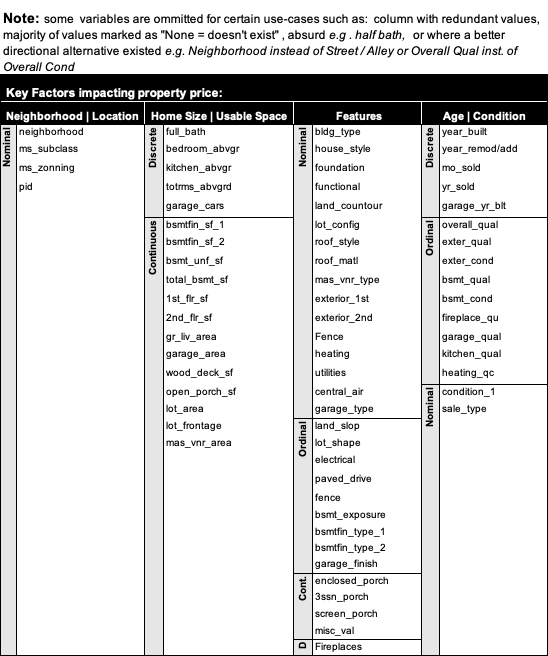
  

**Correlation with Sale Price | Distribution & Outliers** <br>

To measure the strenght of linear relationship between independant variables and sale price, looking into summary  of `correlation` and interpret:
- ~0 == no relationship 
- greater than 0 to 1 == positive to strong positive relationship 
- smallar than 0 to -1 == negative to strong negative relationship <br>

To avoid complexity in model, my strategy here is to focus on attributes that show a linear correlation above 0.5 as listed below. 
*Note: According to National Association of Home Builders nearly 80% of real estate agents say fireplaces increase a home's value by anywhere from $$1,000 to $5,000'*, thus  depending on impact on model score, I may replace mas_vnr_area with fireplaces. 

In [10]:
train.corr()['saleprice'].sort_values(ascending = False)
# selecting attributes with > 0.5 linear regression
train.corr()['saleprice'].sort_values(ascending = False).head(14)

saleprice         1.000000
overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.650241
garage_cars       0.648220
total_bsmt_sf     0.628754
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
full_bath         0.537969
totrms_abvgrd     0.504014
mas_vnr_area      0.503579
fireplaces        0.471093
bsmtfin_sf_1      0.423519
Name: saleprice, dtype: float64

Using scatterplot to get a better direction for narrowing down feature selection and choose only attributes with stronger impact on price. Looking into patterns/outliers, I decide to disregard `garage_cars`.

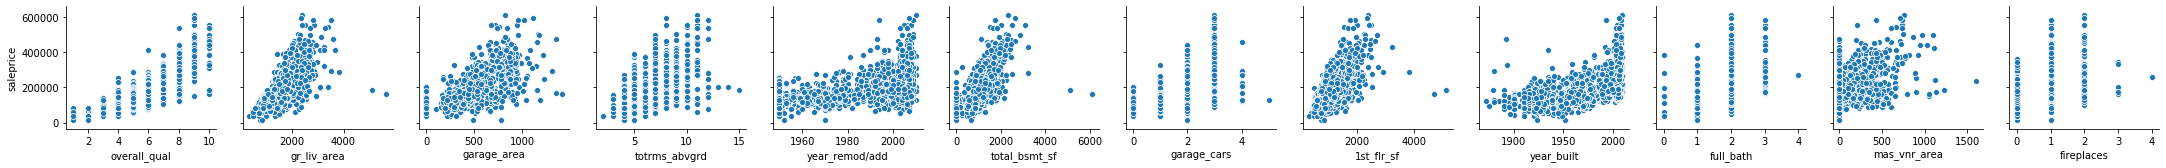

In [11]:
# Using pairplot method to create grouped scatterplots for easier comparison
sns.pairplot(train, y_vars = ['saleprice'],
x_vars = ['overall_qual', 'gr_liv_area','garage_area', 'totrms_abvgrd', 'year_remod/add', 
'total_bsmt_sf','garage_cars', '1st_flr_sf', 'year_built',
'full_bath',  'mas_vnr_area', 'fireplaces']);
plt.savefig('../plots/correlation.png')

Using histogram to verify frequency of data distribution and outliers for the selected features:


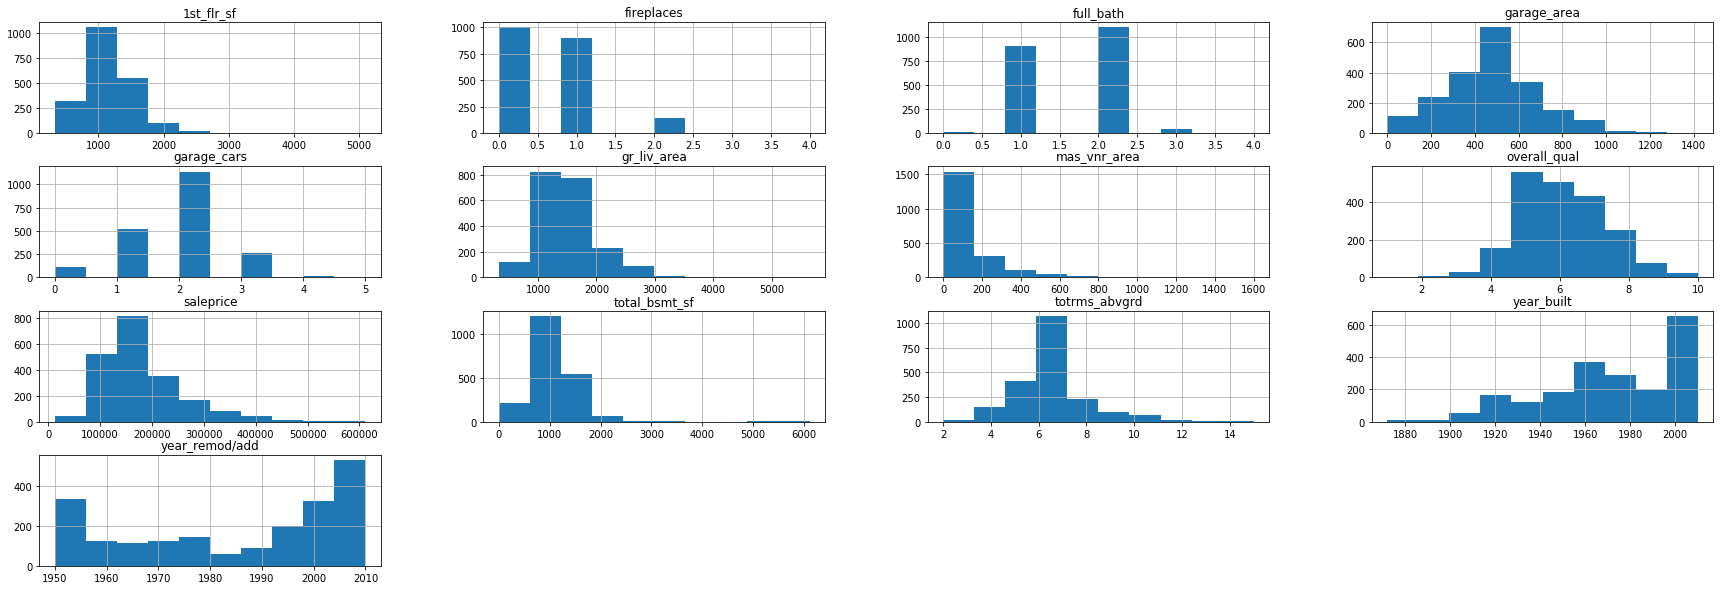

In [12]:
train.hist(['saleprice', 'overall_qual', 'gr_liv_area','garage_area', 'totrms_abvgrd', 'year_remod/add', 
'total_bsmt_sf','garage_cars', '1st_flr_sf', 'year_built',
'full_bath',  'mas_vnr_area', 'fireplaces'], figsize=(30, 10));
plt.savefig('../plots/distribution.png')

>**Key finding:** it appears that saleprice is severly right-skewed as majority of data values are concentrated near lower bound. It makes it difficult to generalize the typical value as there is no clear center point, thus we need to transform saleprice to get a normal dirtribution.

Log Transformation to nomalize distribution for sale_price:

In [13]:
# Log transform of target vector(Y)
train['log_price'] =np.log(train['saleprice'])

### Preprocessing & Modeling:

The following columns are the selected features:<br>
- overall_qual
- gr_live_area
- garage_area
- total_bsmt_sf
- year_remod/add
- totrms_abvgrd
- 1st_flr_sf
- year_built
- fireplaces

The `saleprice` is target; the column that model will be predicting.

**From preprocessing to building the model:**<br>

**1)** Creating features matrix (X) and target vector (y) - `features matrix`(X) = all  independence variables and `target vector` (y) = dependant variabvle model will predict:

In [14]:
#creating `X` and `y` variables
features = ['overall_qual','gr_liv_area', 'year_remod/add', 'totrms_abvgrd', 
'garage_area',  '1st_flr_sf', 'year_built', 'fireplaces']
X = train[features] # feature matrix
y = train['log_price'] # target vector

**2)** Instantiate and fit the model:

In [15]:
model = LinearRegression()

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
cross_val_score(model, X, y, cv=5).mean()

0.8234604829473298

>**2.1) Feature Engineering:** Before moving forward, checking to see if model score can be optimized through feature engineering, here I use two methods:<br>
- `Interaction Terms` : combination of features matrix (creates an interation of one feature with anoher) 
- `Logical filters`: 

with PolynomialFeatures model $R^2$ got improved from 0.82 t0 0.85 - thus moving forward with the new model:  

In [18]:
#using PolynomialFeatures for interaction terms  
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y);
cross_val_score(model, X_poly, y, cv=5).mean()

0.8498186593901492

**3)** Splitting (X) and (y) into train and test sets:

In [19]:
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, random_state = 42)

In [20]:
ss = StandardScaler()
ss.fit(X_poly_train)
X_train_sc = ss.transform(X_poly_train)
X_test_sc = ss.transform(X_poly_test) 
poly_model.fit(X_train_sc, y_train);

Running `coef` and `intercept` to check the bias and coefficnet for each selected feature in matrix (X). in cells below, intercept indicates the average price for a house without any features selected in matrix (X( (this metric is not realistic for this use-case), while  coef shows the expected increase in sale price for each feature if holding all other variables constant. 

In [21]:
poly_model.intercept_

12.022826060510514

In [22]:
poly_model.coef_

array([ 1.16616990e+00, -3.55253778e+00, -5.71290545e+00,  1.29531596e+00,
        1.68204110e-01, -7.36568533e-01,  4.54633226e+00,  1.92435385e+00,
       -2.32075326e-01,  6.31336760e-02, -1.21280409e+00,  3.84902647e-02,
        1.23993976e-01,  8.83706160e-02,  2.37864825e-01,  4.69149534e-02,
       -1.80051665e-02,  4.19798298e+00,  9.15302808e-02, -1.75668552e-01,
       -2.82527890e-01, -3.56443173e-01,  3.64604646e-02,  6.63231422e+00,
       -7.09154887e-01,  1.11276417e-01, -1.42461999e+00, -1.91031094e+00,
       -4.46382932e-01, -4.25734603e-02,  1.61927254e-01, -7.41100866e-02,
       -6.52942405e-01, -2.90272213e-02,  4.74363570e-03, -6.81605610e-02,
       -3.04415137e-01,  7.90577255e-03,  3.68238744e-02,  2.36429675e+00,
        5.85902230e-02, -3.26567128e+00, -1.51797092e+00, -2.04777058e-02])

**4)** Get the baseline score for both train/test sets (cross validation) for evaluation:

In [23]:
#Look into train score
cross_val_score(poly_model, X_train_sc, y_train, cv=5).mean()

0.8362440444973249

In [24]:
#Look into test score
cross_val_score(poly_model, X_test_sc, y_test, cv=5).mean()

0.8037105635840813

**5)** Genereting model prediction and finding the line of best fit:

In [25]:
#model predictions
y_prediction_train = poly_model.predict(X_train_sc)

In [26]:
#model predictions
y_prediction_test = poly_model.predict(X_test_sc)

In [27]:
metrics.r2_score(y_train, y_prediction_train)

0.8691408623926159

In [42]:
# 85% of the variance in the dependant variable can be exlained by this model.
metrics.r2_score(y_test, y_prediction_test)

0.8531784379632119

In [46]:
residual_train = y_train - y_prediction_train

In [47]:
residual_test = y_test - y_prediction_test

Plotting residual to check if variance between our low predictions and our high predictions is consistent, the plot below shows that our target is almost normally distributed. However, it might require to git rid of the couple of features with extreme outlier: 

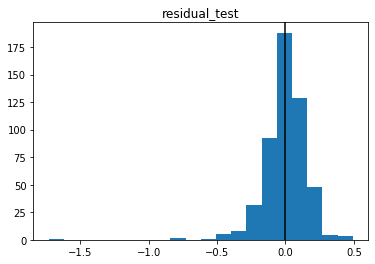

In [58]:
plt.hist(residual_test, bins = 20)
plt.axvline(0, color = 'black');
plt.savefig('../plots/residual_hist.png')
plt.title('residual_test');

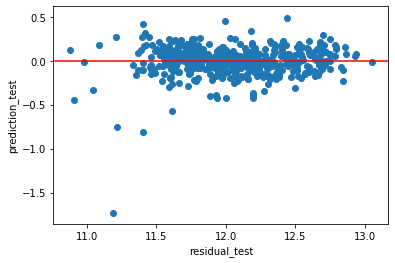

In [32]:
plt.scatter(y_prediction_test, residual_test)
plt.axhline(0, color='r');
plt.xlabel("residual_test")
plt.ylabel("prediction_test")
plt.savefig('../plots/prediction_residual.png')

**Regression Metrics:** 

**MAE** shows by average our model is 0.11 point off:

In [33]:
# TRAIN - Mean Absolute Error represents median distance from the predicted value.
metrics.mean_absolute_error(y_train,y_prediction_train)

0.10665083591206655

In [34]:
#TEST - Mean Absolute Error represents median distance from the predicted value.
metrics.mean_absolute_error(y_test,y_prediction_test)

0.10727852586689708

**MSE** is the average sum of all errors squared and should be as close to 0 as possible. our model shows a low MSE for both train /test sets. this indicates that the model is fairly fit.

In [35]:
# TRAIN - Mean Squarred Error represents avg distance squared from the predicted value.
metrics.mean_squared_error(y_train, y_prediction_train)

0.021695918664479032

In [36]:
#TEST - Mean Squarred Error represents avg distance squared from the predicted value.
metrics.mean_squared_error(y_test, y_prediction_test)

0.026276784006557863

**RMSE** the goal is always to get RMSE as close to 0 as possible - RMSE indicates that the model is approx off by +/-$27K when predicting the house's sale price.

In [37]:
#TRAIN - Root Mean Squared Error represents avg distance from the predicted value.
#using np.exp to inverse the log transform for saleprice
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_prediction_test)))

25932.056416049447

In [38]:
#TEST- Root Mean Squared Error represents avg distance from the predicted value.
np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_prediction_train)))

27129.552608784496

In [39]:
# Importing the stats model API
import statsmodels.api as sm
# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.257e+06
Date:                Mon, 13 Jan 2020   Prob (F-statistic):                        0.00
Time:                        21:23:02   Log-Likelihood:                          706.10
No. Observations:                2051   AIC:                                     -1396.
Df Residuals:                    2043   BIC:                                     -1351.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
overall_qual       0.0963      0.004     25.889      0.000       0.089       0.104
gr_liv_area        0.0002   1.63e-05     10.506      0.000       0.000       0.000
year_remod/add     0.0032      0.000     18.664      0.000       0.003       0.004
totrms_abvgrd      0.0058      0.004      1.361      0.174      -0.003       0.014
garage_area        0.0002    2.3e-05      9.315      0.000       0.000       0.000
1st_flr_sf         0.0001   1.25e-05      9.573      0.000    9.53e-05       0.000
year_built         0.0023      0.000     13.359      0.000       0.002       0.003
fireplaces         0.0792      0.007     11.477      0.000       0.066       0.093
==============================================================================
Omnibus:                     1561.963   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84293.109
Skew:                          -3.070   Prob(JB):                         0.00
Kurtosis:                      33.801   Cond. No.                     6.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Below cell shows the impact of each feature on property's sale price, for example,  if the house has a fireplace, we expect to see about 8% increase in the sale price.

In [40]:
np.exp(model.params)

overall_qual      1.101055
gr_liv_area       1.000172
year_remod/add    1.003178
totrms_abvgrd     1.005827
garage_area       1.000214
1st_flr_sf        1.000120
year_built        1.002314
fireplaces        1.082466
dtype: float64

### Conclusion and Recommendations:

As of now **`85.3%`** of variance in the sale price can be explained by this model, indicating that the model is just right. In other words, model can generalize from train/test data to predict the house value, with **`+/-$27K`** price error. This model is built using numeric datasets, and can be improved by leveraging feature engineering to include some other  interesting features like Neighborhood house style and materials.<br> 

Nevertheless, this model can be used for the following purposes:<br>

<>**Prediction**<> <br>
This model can be used for any dataset that includes similar attributes on house features to predict the property's selling price.<br>

<>**Inference**<> <br>
This model can be used to outline and test some of the most important factors/features that influence house's value. 